# <center> **LABORATORIO NRO 2** </center> 

In [ ]:
#librerias
import torch
import torchvision
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import random
from torchvision.datasets import ImageFolder


In [13]:
def cargar_dataset_train(ruta_dataset, tamaño_imagen=(100, 100)):
    # Reiniciar variables
    dataset = []
    etiquetas_mapping = {}

    # Obtener clases del nuevo dataset y ordenarlas
    clases = sorted(os.listdir(ruta_dataset))

    # Mapeo de etiquetas a valores numéricos
    etiquetas_mapping = {clase: idx for idx, clase in enumerate(clases)}

    for clase in clases:
        #print(f"Procesando clase testing: {clase} ({etiquetas_mapping[clase]})")
        ruta_clase = os.path.join(ruta_dataset, clase)
        etiqueta_num = etiquetas_mapping[clase]  # Obtener el valor numérico de la etiqueta directamente
        with os.scandir(ruta_clase) as entries:
            for idx, entry in enumerate(entries, start=1):
                if entry.is_file():
                    imagen_ruta = os.path.join(ruta_clase, entry.name)
                    # Abrir imagen como objeto PIL
                    imagen = Image.open(imagen_ruta).convert('RGB')
                    # Normalizar la imagen
                    imagen = np.array(imagen) / 255.0
                    # Convertir la imagen normalizada a objeto PIL
                    imagen_pil = Image.fromarray((imagen * 255).astype(np.uint8))
                    # Redimensionar imagen
                    imagen_resized = imagen_pil.resize(tamaño_imagen)
                    dataset.append((imagen_resized, etiqueta_num))  # Tupla con imagen y etiqueta numérica

    random.shuffle(dataset)
    return dataset



In [14]:
def cargar_dataset_test(ruta_dataset, tamaño_imagen=(100, 100)):
    # Reiniciar variables
    dataset = []
    etiquetas_mapping = {}

    # Obtener clases del nuevo dataset y ordenarlas
    clases = sorted(os.listdir(ruta_dataset))

    # Mapeo de etiquetas a valores numéricos
    etiquetas_mapping = {clase: idx for idx, clase in enumerate(clases)}

    for clase in clases:
        
        ruta_clase = os.path.join(ruta_dataset, clase)
        etiqueta_num = etiquetas_mapping[clase]  
        with os.scandir(ruta_clase) as entries:
            for idx, entry in enumerate(entries, start=1):
                if entry.is_file():
                    imagen_ruta = os.path.join(ruta_clase, entry.name)
                    # Abrir imagen como objeto PIL
                    imagen = Image.open(imagen_ruta).convert('RGB')
                    # Normalizar la imagen
                    imagen = np.array(imagen) / 255.0
                    # Convertir la imagen normalizada a objeto PIL
                    imagen_pil = Image.fromarray((imagen * 255).astype(np.uint8))
                    # Redimensionar imagen
                    imagen_resized = imagen_pil.resize(tamaño_imagen)
                    dataset.append((imagen_resized, etiqueta_num))  

    random.shuffle(dataset)
    return dataset



In [15]:


trainset = cargar_dataset_train(r'C:\Users\micky\OneDrive\Escritorio\IA2\Datasets\dog-cat\Train')
testset = cargar_dataset_test(r'C:\Users\micky\OneDrive\Escritorio\IA2\Datasets\dog-cat\Test')

print("Número de ejemplos en el conjunto de entrenamiento:", len(trainset))
print("Número de ejemplos en el conjunto de prueba:", len(testset))

Número de ejemplos en el conjunto de entrenamiento: 23650
Número de ejemplos en el conjunto de prueba: 3863


In [17]:
classes = {v: k for k, v in ImageFolder(r'C:\Users\micky\OneDrive\Escritorio\IA2\Datasets\dog-cat\Train').class_to_idx.items()}
print(classes)
print(len(classes))

{0: 'Cat', 1: 'Dog'}
2


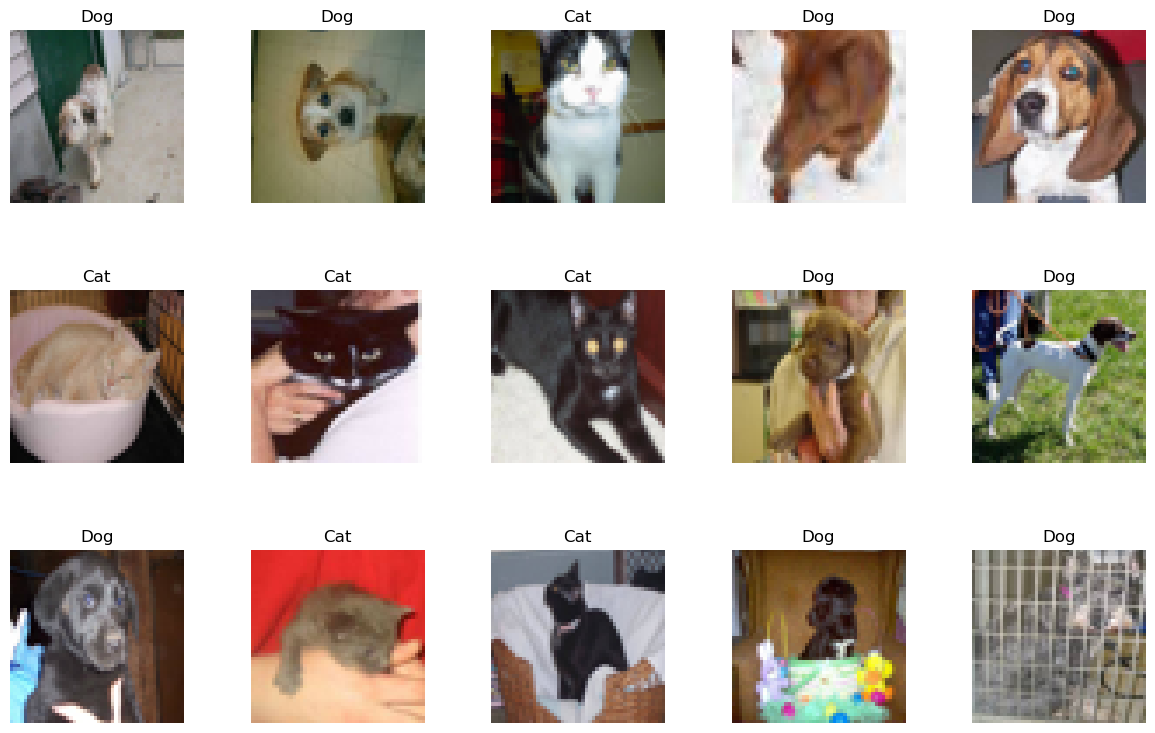

In [18]:
import random
import matplotlib.pyplot as plt

r, c = 3, 5
plt.figure(figsize=(c*3, r*3))
for row in range(r):
    for col in range(c):
        index = c*row + col
        plt.subplot(r, c, index + 1)
        ix = random.randint(0, len(trainset)-1)
        img, label = trainset[ix]
        #print(label)
        #clase_index = classes.index(clase)
        plt.imshow(img)
        plt.axis('off')
        plt.title(classes[label])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [19]:
# convertimos imágenes a arrays de numpy
train_images = np.array([np.array(img) for img, label in trainset])
test_images = np.array([np.array(img) for img, label in testset])

train_labels = np.array([label for img, label in trainset])
test_labels = np.array([label for img, label in testset])

In [20]:
# ver número de imágenes, resolución y número de canales
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((23650, 50, 50, 3), (3863, 50, 50, 3), (23650,), (3863,))

## <center> **RECETA DE ENTRENAMIENTO** </center> 

#Verificacion de datos

In [21]:
# tipo de datos
train_images.dtype, train_labels.dtype

(dtype('uint8'), dtype('int32'))

In [22]:
unique, counts = np.unique(train_labels, return_counts=True)
(unique, counts)

(array([0, 1]), array([11823, 11827], dtype=int64))

#Validando MLP

In [23]:
def build_model(D_in=50*50*3, H=100, D_out=15):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    )

In [24]:
#Enviamos un batch de 64 y la salida deberia ser un vector de 15 valores por cada imagen del batch
model = build_model()
test_input = torch.randn((64, 50*50*3))
test_output = model(test_input)
test_output.shape

torch.Size([64, 15])

In [25]:
train_images = np.array([np.array(img) for img, label in trainset])
X_test = np.array([np.array(img) for img, label in testset])

train_labels = np.array([label for img, label in trainset])
y_test = np.array([label for img, label in testset])

X_train, X_val, X_subset = train_images[:20000], train_images[20000:], train_images[:5000]
y_train, y_val, y_subset = train_labels[:20000], train_labels[20000:], train_labels[:5000]

X_train.shape, X_val.shape, X_test.shape, X_subset.shape

((20000, 50, 50, 3), (3650, 50, 50, 3), (3863, 50, 50, 3), (5000, 50, 50, 3))

Una vez nos hemos asegurado que las dimensiones de nuestra red están bien, el siguiente paso es asegurarnos de que es capaz de aprenderse de memoria una sola muestra del dataset.

In [26]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().view(-1, 50*50*3)
        self.Y = torch.from_numpy(Y).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [27]:
# fit de una imagen del dataset
dataset = Dataset(X_subset[3:4], y_subset[3:4])
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

len(dataset)

1

Podemos ver que logramos el fit de una sola imagen sin problema

In [28]:
epochs = 5
criterion = torch.nn.CrossEntropyLoss()
model = build_model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for e in range(1, epochs+1):
    for x_b, y_b in dataloader:
        #print(y_b)
        y_pred = model(x_b)
        loss = criterion(y_pred, y_b)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Epoch {e}/{epochs} loss {loss.item():.5f} y {y_b.item()} y_pred {torch.argmax(y_pred, axis=1).item()}")

Epoch 1/5 loss 2.68231 y 0 y_pred 12
Epoch 2/5 loss 0.00000 y 0 y_pred 0
Epoch 3/5 loss 0.00000 y 0 y_pred 0
Epoch 4/5 loss 0.00000 y 0 y_pred 0
Epoch 5/5 loss 0.00000 y 0 y_pred 0


Ahora siguiendo la misma logica del anterior entrenamiento, el modelo deberia ser capaz de aprenderse de memoria un solo batch de imagenes

In [29]:
# fit de un batch

dataset = Dataset(X_subset[:64], y_subset[:64])
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

len(dataset)

64

In [30]:
epochs = 200
criterion = torch.nn.CrossEntropyLoss()
model = build_model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for e in range(1, epochs+1):
    for x_b, y_b in dataloader:
        y_pred = model(x_b)
        loss = criterion(y_pred, y_b)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (y_b == torch.argmax(y_pred, axis=1)).sum().item()
        #print(acc)
        if not e % 10:
            print(f"Epoch {e}/{epochs} loss {loss.item():.5f} acc {acc}/{y_b.shape[0]}")

Epoch 10/200 loss 0.66104 acc 36/64
Epoch 20/200 loss 0.54095 acc 52/64
Epoch 30/200 loss 0.41238 acc 54/64
Epoch 40/200 loss 0.28025 acc 61/64
Epoch 50/200 loss 0.16546 acc 63/64
Epoch 60/200 loss 0.08699 acc 63/64
Epoch 70/200 loss 0.04350 acc 64/64
Epoch 80/200 loss 0.02291 acc 64/64
Epoch 90/200 loss 0.01371 acc 64/64
Epoch 100/200 loss 0.00919 acc 64/64
Epoch 110/200 loss 0.00674 acc 64/64
Epoch 120/200 loss 0.00525 acc 64/64
Epoch 130/200 loss 0.00427 acc 64/64
Epoch 140/200 loss 0.00357 acc 64/64
Epoch 150/200 loss 0.00304 acc 64/64
Epoch 160/200 loss 0.00263 acc 64/64
Epoch 170/200 loss 0.00230 acc 64/64
Epoch 180/200 loss 0.00204 acc 64/64
Epoch 190/200 loss 0.00181 acc 64/64
Epoch 200/200 loss 0.00162 acc 64/64


#Entrenando sub-conjunto de datos

In [31]:
dataset = {
    'train': Dataset(X_subset, y_subset),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=32, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(5000, 3650)

In [32]:
from sklearn.metrics import accuracy_score

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def fit(model, dataloader, optimizer, scheduler=None, epochs=None, log_each=1, weight_decay=0, early_stopping=0, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.numpy(), y_probas.detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.numpy(), y_probas.numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        if scheduler:
            scheduler.step()
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each and verbose:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f} lr {lr[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc, 'lr': lr}

In [33]:
# Ver que learning rate es adecuado
lrs = [0.0001, 0.0003, 0.0005]
hists = []
for lr in lrs:
    print(f"Probando lr {lr}")
    model = build_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    hist = fit(model, dataloader, optimizer, epochs=10, verbose=0)
    hists.append(hist)


Probando lr 0.0001
Probando lr 0.0003
Probando lr 0.0005


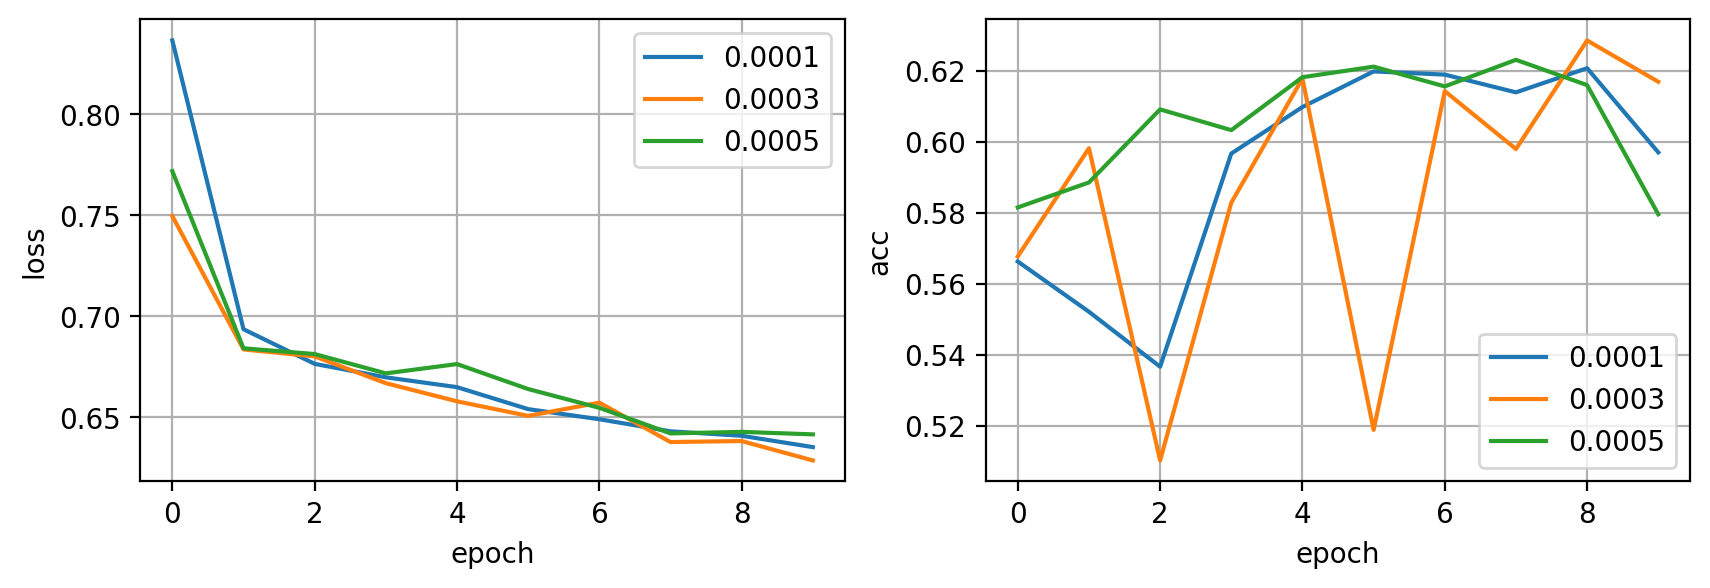

In [34]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
for i in range(len(lrs)):
    ax.plot(hists[i]['loss'], label=lrs[i])
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
for i in range(len(lrs)):
    ax.plot(hists[i]['val_acc'], label=lrs[i])
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

Repetimos lo mismo pero ahora con todos los datos

In [35]:
dataset = {
    'train': Dataset(X_train, y_train),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=32, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(20000, 3650)

In [36]:
hists = []
for lr in lrs:
    print(f"Probando lr {lr}")
    model = build_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    hist = fit(model, dataloader, optimizer, epochs=10, verbose=0)
    hists.append(hist)

Probando lr 0.0001
Probando lr 0.0003
Probando lr 0.0005


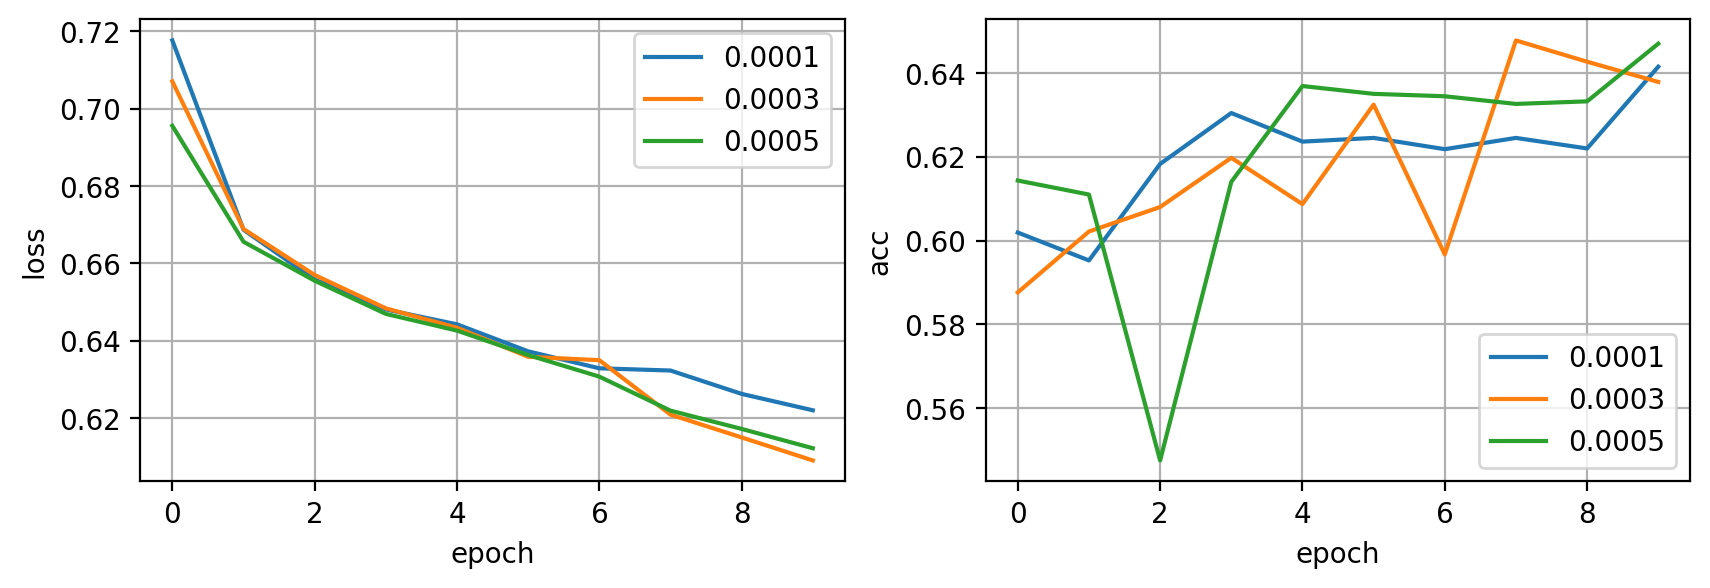

In [37]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
for i in range(len(lrs)):
    ax.plot(hists[i]['loss'], label=lrs[i])
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
for i in range(len(lrs)):
    ax.plot(hists[i]['val_acc'], label=lrs[i])
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

#Tuneado de hyperparámetros

In [38]:
bss = [16, 32, 64, 128, 256]
lrs = [0.0001, 0.0003, 0.0005]
n = 5
hists = []
for i in range(n):
    lr = random.choice(lrs)
    bs = random.choice(bss)
    print(f"Test {i+1} lr {lr} bs {bs}")
    dataloader = {
        'train': torch.utils.data.DataLoader(dataset['train'], batch_size=bs, shuffle=True),
        'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
    }
    model = build_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    hist = fit(model, dataloader, optimizer, epochs=20, verbose=0)
    hists.append({'hist': hist, 'lr': lr, 'bs': bs})

Test 1 lr 0.0003 bs 128
Test 2 lr 0.0005 bs 64
Test 3 lr 0.0005 bs 64
Test 4 lr 0.0005 bs 32
Test 5 lr 0.0001 bs 128


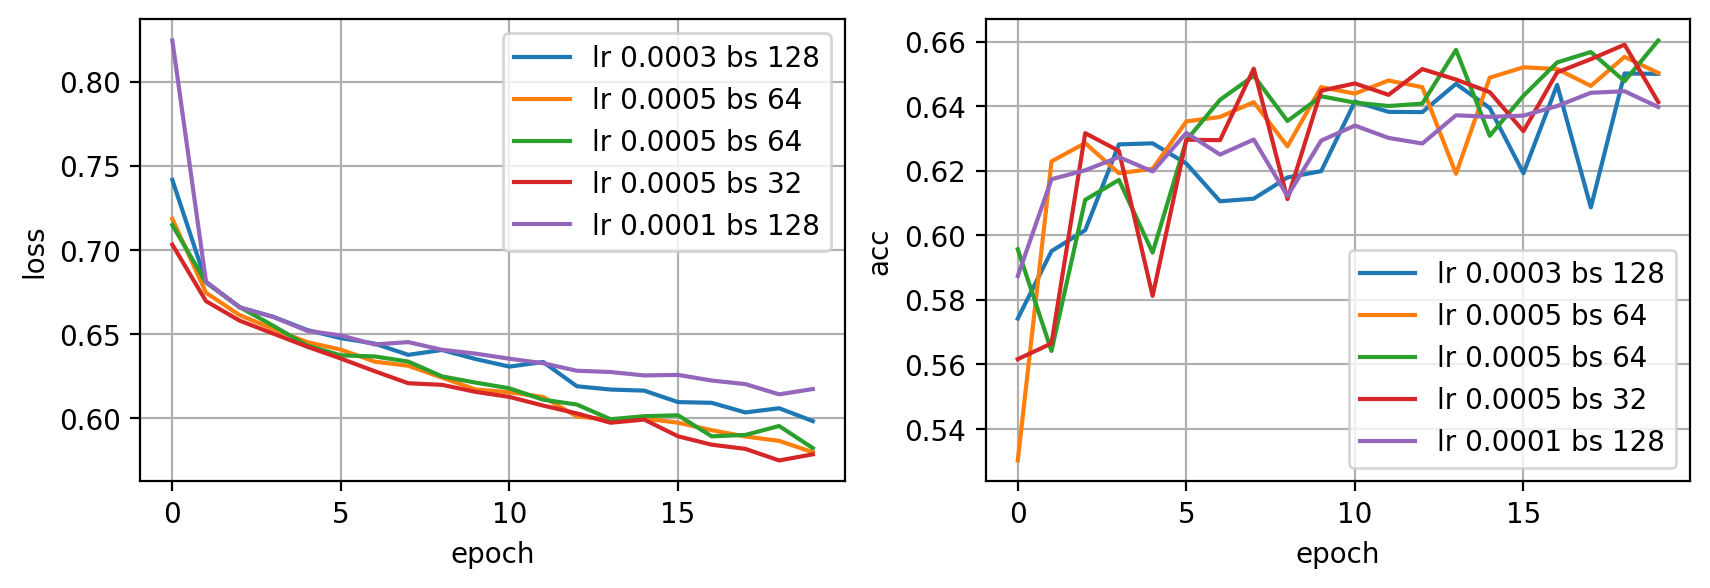

In [39]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
for i in range(len(hists)):
    ax.plot(hists[i]['hist']['loss'], label=f'lr {hists[i]["lr"]} bs {hists[i]["bs"]}')
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
for i in range(len(hists)):
    ax.plot(hists[i]['hist']['val_acc'], label=f'lr {hists[i]["lr"]} bs {hists[i]["bs"]}')
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# <center> **REGULARIZACION** </center> 

## MLP sin ninguna regularizacion

In [40]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().view(-1, 50*50*3)
        self.Y = torch.from_numpy(Y).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

dataset = {
    'train': Dataset(X_subset, y_subset),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=128, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(5000, 3650)

In [41]:
from sklearn.metrics import accuracy_score

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def build_model(D_in=50*50*3, H=100, D_out=15):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    )

def fit(model, dataloader, epochs=200, log_each=10, weight_decay=0):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0005, weight_decay=weight_decay)
    l, acc = [], []
    val_l, val_acc = [], []
    for e in range(1, epochs+1):
        _l, _acc = [], []
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f}")
    return {'epoch': list(range(1, epochs+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}

In [42]:
model = build_model()
hist = fit(model, dataloader)

Epoch 10/200 loss 0.76399 acc 0.52187 val_loss 0.75591 val_acc 0.52519
Epoch 20/200 loss 0.71145 acc 0.52754 val_loss 0.71124 val_acc 0.55663
Epoch 30/200 loss 0.70096 acc 0.55117 val_loss 0.70168 val_acc 0.53706
Epoch 40/200 loss 0.69556 acc 0.56133 val_loss 0.69813 val_acc 0.52527
Epoch 50/200 loss 0.69353 acc 0.57070 val_loss 0.69364 val_acc 0.57060
Epoch 60/200 loss 0.68971 acc 0.58828 val_loss 0.69359 val_acc 0.50987
Epoch 70/200 loss 0.68801 acc 0.58301 val_loss 0.68955 val_acc 0.57746
Epoch 80/200 loss 0.68700 acc 0.58242 val_loss 0.68845 val_acc 0.57038
Epoch 90/200 loss 0.68443 acc 0.58750 val_loss 0.68670 val_acc 0.57821
Epoch 100/200 loss 0.68415 acc 0.58574 val_loss 0.68548 val_acc 0.57271
Epoch 110/200 loss 0.68124 acc 0.59766 val_loss 0.68453 val_acc 0.56390
Epoch 120/200 loss 0.67935 acc 0.60137 val_loss 0.68286 val_acc 0.58394
Epoch 130/200 loss 0.68024 acc 0.59199 val_loss 0.68214 val_acc 0.57277
Epoch 140/200 loss 0.67772 acc 0.59512 val_loss 0.68431 val_acc 0.56937
E

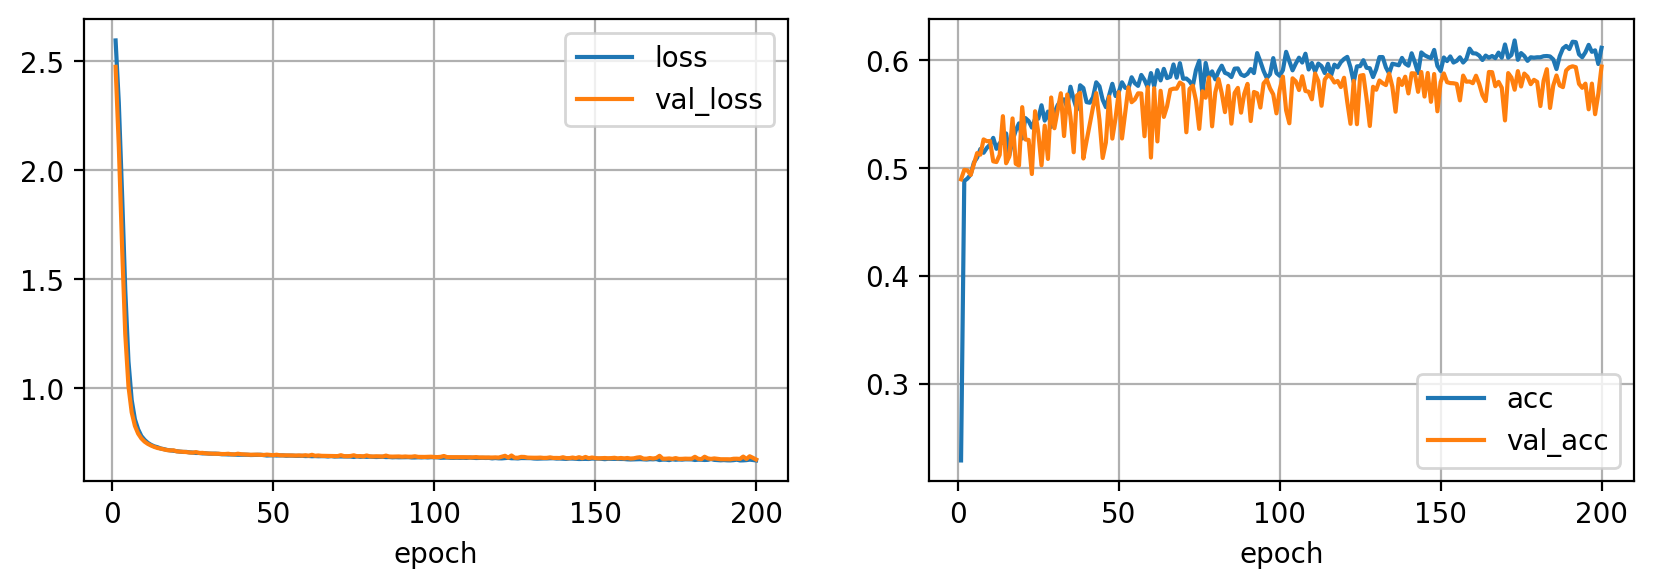

In [43]:
import pandas as pd

fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# MLP aplicando L2 y Early_stopping

In [44]:
def fit(model, dataloader, epochs=200, log_each=10, weight_decay=0, early_stopping=0):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=weight_decay)
    l, acc = [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}

In [45]:
model = build_model()
hist = fit(model, dataloader, weight_decay=0.01, early_stopping=20)

Mejor modelo guardado con acc 0.50217 en epoch 1
Mejor modelo guardado con acc 0.50242 en epoch 6
Epoch 10/200 loss 0.70186 acc 0.53379 val_loss 0.89373 val_acc 0.50242
Mejor modelo guardado con acc 0.52902 en epoch 11
Mejor modelo guardado con acc 0.53608 en epoch 13
Mejor modelo guardado con acc 0.55058 en epoch 17
Epoch 20/200 loss 0.67551 acc 0.59082 val_loss 0.69824 val_acc 0.54652
Mejor modelo guardado con acc 0.60988 en epoch 24
Mejor modelo guardado con acc 0.61069 en epoch 30
Epoch 30/200 loss 0.66436 acc 0.61094 val_loss 0.65849 val_acc 0.61069
Mejor modelo guardado con acc 0.61933 en epoch 32
Epoch 40/200 loss 0.65734 acc 0.61953 val_loss 1.00999 val_acc 0.49758
Mejor modelo guardado con acc 0.62060 en epoch 42
Mejor modelo guardado con acc 0.62904 en epoch 49
Epoch 50/200 loss 0.65030 acc 0.62207 val_loss 0.84989 val_acc 0.50135
Epoch 60/200 loss 0.65340 acc 0.62715 val_loss 0.79307 val_acc 0.54956
Entrenamiento detenido en epoch 69 por no mejorar en 20 epochs seguidas


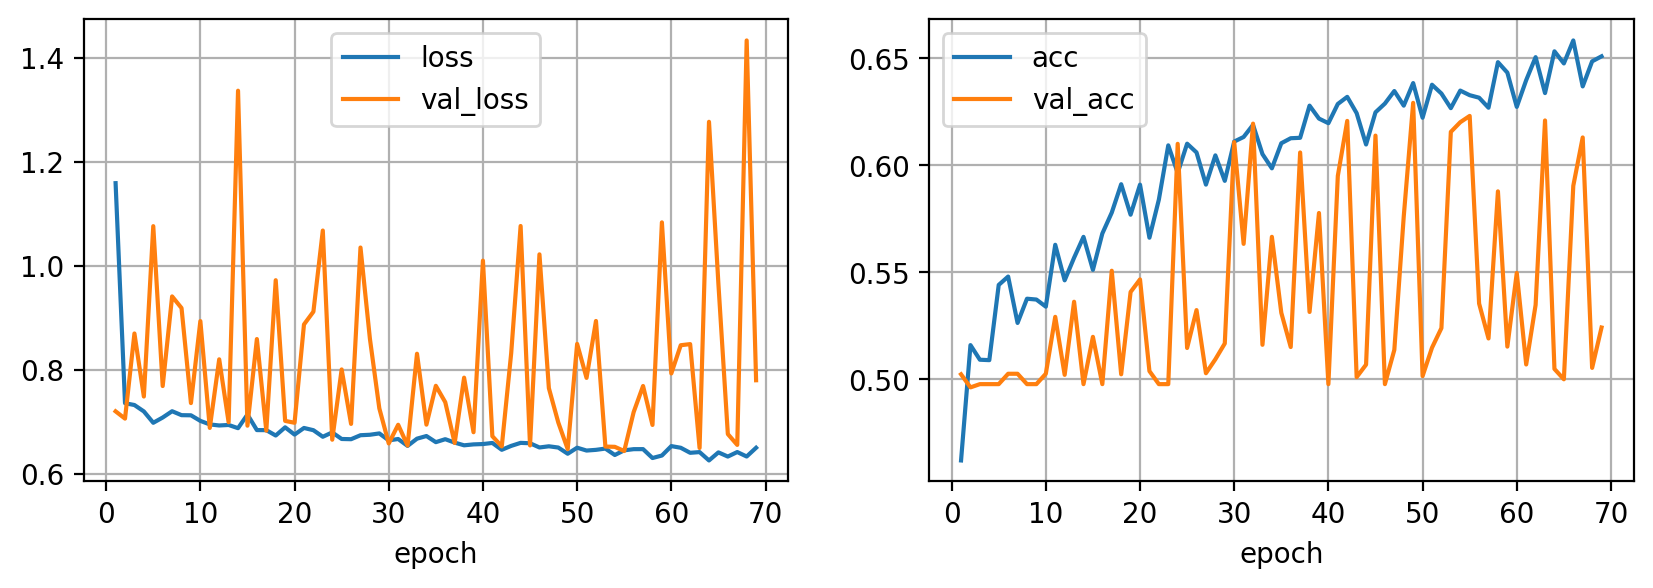

In [46]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# Añadiendole Dropout

In [47]:
def build_model(D_in=50*50*3, H=100, D_out=15, p=0):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, D_out)
    )

In [48]:
model = build_model(p=0.5)
hist = fit(model, dataloader)

Mejor modelo guardado con acc 0.50242 en epoch 1
Epoch 10/200 loss 0.72463 acc 0.51035 val_loss 0.71848 val_acc 0.50242
Mejor modelo guardado con acc 0.50267 en epoch 20
Epoch 20/200 loss 0.71191 acc 0.50020 val_loss 0.69535 val_acc 0.50267
Epoch 30/200 loss 0.70888 acc 0.50918 val_loss 0.69797 val_acc 0.50204
Epoch 40/200 loss 0.70641 acc 0.51055 val_loss 0.70959 val_acc 0.50242
Mejor modelo guardado con acc 0.52313 en epoch 42
Epoch 50/200 loss 0.70370 acc 0.51719 val_loss 0.83052 val_acc 0.50242
Mejor modelo guardado con acc 0.55496 en epoch 52
Mejor modelo guardado con acc 0.57335 en epoch 59
Epoch 60/200 loss 0.69662 acc 0.53613 val_loss 0.69033 val_acc 0.53275
Epoch 70/200 loss 0.69620 acc 0.53438 val_loss 0.69650 val_acc 0.52248
Epoch 80/200 loss 0.69621 acc 0.54258 val_loss 0.68967 val_acc 0.49758
Epoch 90/200 loss 0.69240 acc 0.54785 val_loss 0.83847 val_acc 0.49758
Mejor modelo guardado con acc 0.58927 en epoch 92
Mejor modelo guardado con acc 0.59146 en epoch 94
Epoch 100/20

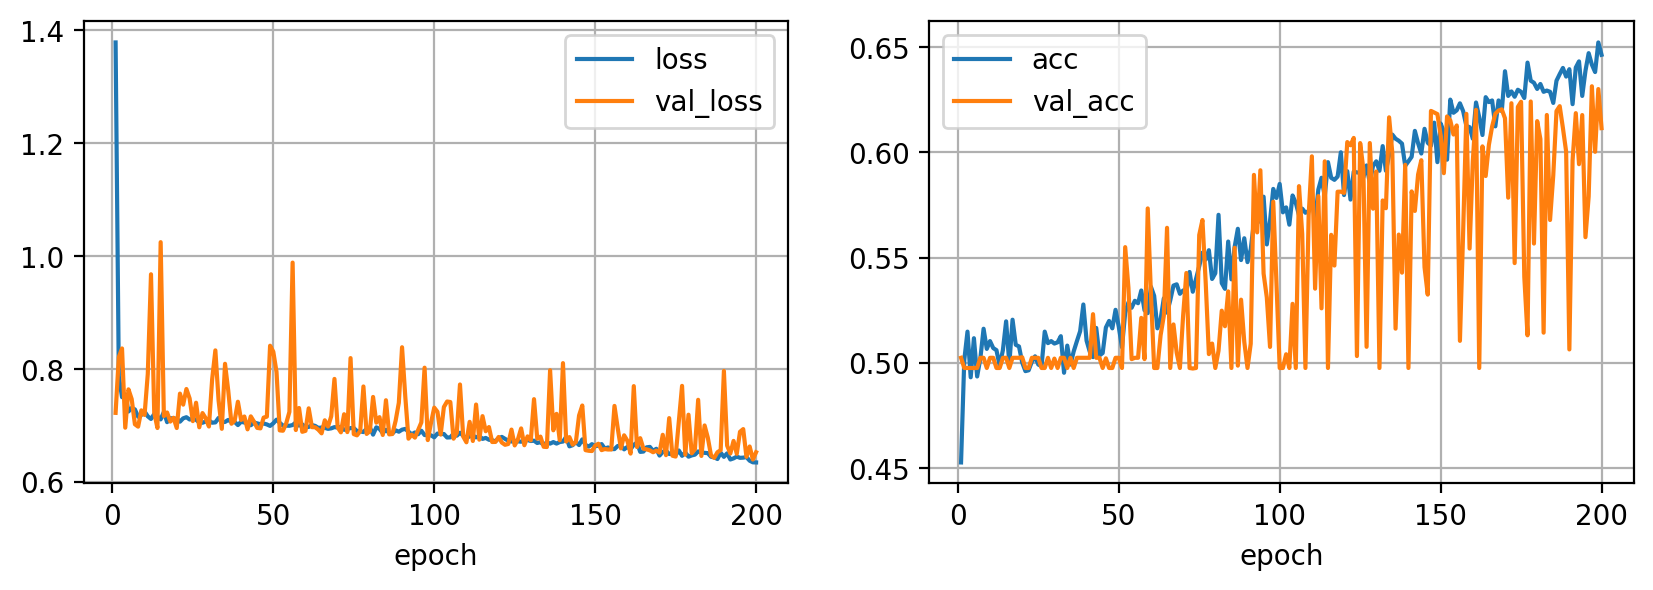

In [49]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# Usando todos los datos

In [50]:
dataset = {
    'train': Dataset(X_train, y_train),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(20000, 3650)

In [51]:
model = build_model()
hist = fit(model, dataloader, early_stopping=10)

Mejor modelo guardado con acc 0.49783 en epoch 1
Mejor modelo guardado con acc 0.58627 en epoch 3
Mejor modelo guardado con acc 0.59263 en epoch 4
Mejor modelo guardado con acc 0.60596 en epoch 7
Mejor modelo guardado con acc 0.61619 en epoch 8
Mejor modelo guardado con acc 0.62277 en epoch 9
Mejor modelo guardado con acc 0.62823 en epoch 10
Epoch 10/200 loss 0.64985 acc 0.62520 val_loss 0.63778 val_acc 0.62823
Mejor modelo guardado con acc 0.63544 en epoch 11
Mejor modelo guardado con acc 0.63790 en epoch 15
Mejor modelo guardado con acc 0.63896 en epoch 17
Mejor modelo guardado con acc 0.64725 en epoch 18
Epoch 20/200 loss 0.61733 acc 0.65780 val_loss 0.62826 val_acc 0.63052
Mejor modelo guardado con acc 0.65785 en epoch 26
Mejor modelo guardado con acc 0.66085 en epoch 29
Epoch 30/200 loss 0.59210 acc 0.68351 val_loss 0.60790 val_acc 0.66040
Mejor modelo guardado con acc 0.66096 en epoch 34
Mejor modelo guardado con acc 0.66377 en epoch 36
Epoch 40/200 loss 0.57170 acc 0.70238 val_l

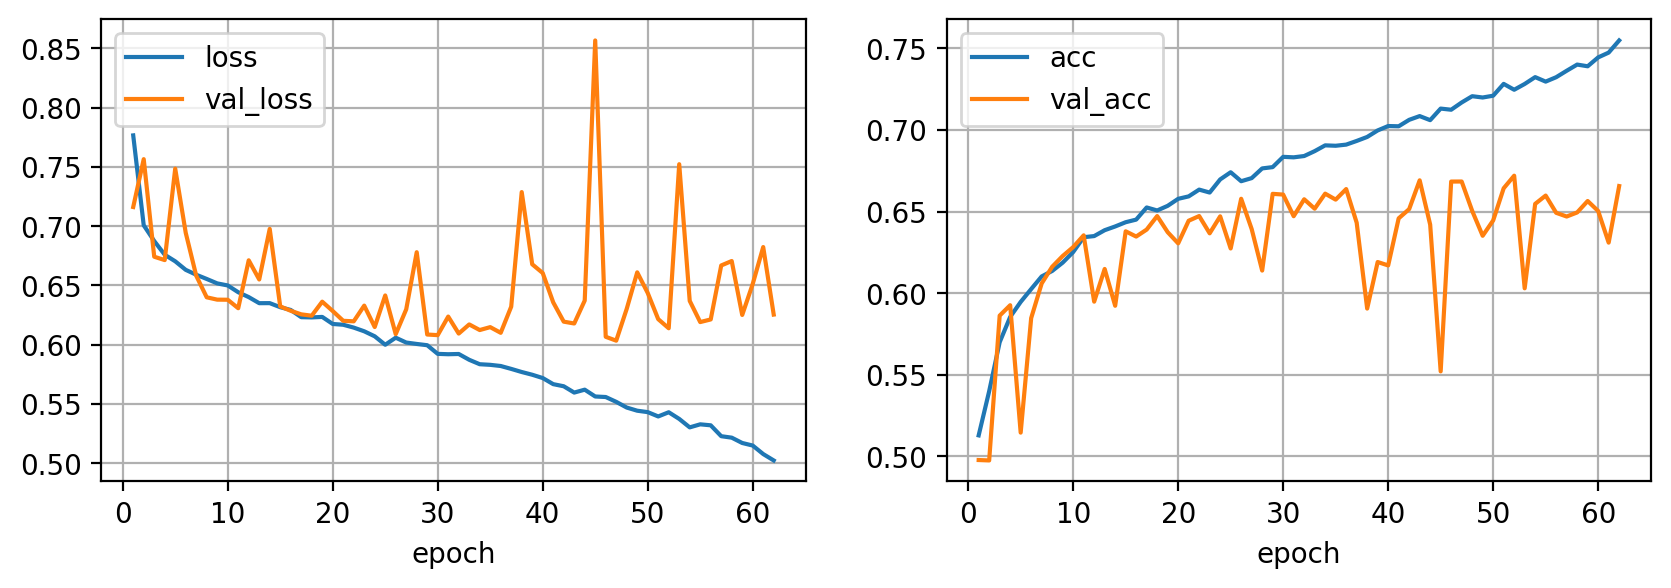

In [52]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# Usando Data_Augmentation


In [53]:
from albumentations import Compose, RandomCrop, Resize, HorizontalFlip, ToGray, RGBShift, OneOf

trans = Compose([
    RandomCrop(24,24),
    Resize(50, 50),
    HorizontalFlip(),
    OneOf([
        ToGray(p=0.2),
        RGBShift(p=0.3)
    ])
])

class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y, trans=None):
        self.X = X
        self.Y = Y
        self.trans = trans
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        img = self.X[ix]
        if self.trans:
            img = trans(image=img)["image"]
        img = torch.from_numpy(img / 255.).float().view(-1)
        label = torch.tensor(self.Y[ix]).long()
        return img, label

dataset = {
    'train': Dataset(X_train, y_train, trans=trans),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=128, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(20000, 3650)

In [54]:

model = build_model()
hist = fit(model, dataloader, early_stopping=20)

Mejor modelo guardado con acc 0.50242 en epoch 1
Mejor modelo guardado con acc 0.52417 en epoch 4
Mejor modelo guardado con acc 0.54931 en epoch 9
Mejor modelo guardado con acc 0.57444 en epoch 10
Epoch 10/200 loss 0.70186 acc 0.51503 val_loss 0.68550 val_acc 0.57444
Epoch 20/200 loss 0.69411 acc 0.53722 val_loss 0.70778 val_acc 0.49758
Mejor modelo guardado con acc 0.57781 en epoch 23
Mejor modelo guardado con acc 0.58525 en epoch 29
Epoch 30/200 loss 0.68980 acc 0.54663 val_loss 0.72044 val_acc 0.49758
Mejor modelo guardado con acc 0.59033 en epoch 33
Mejor modelo guardado con acc 0.59087 en epoch 35
Epoch 40/200 loss 0.68836 acc 0.54673 val_loss 0.68890 val_acc 0.55152
Epoch 50/200 loss 0.68684 acc 0.54961 val_loss 0.67439 val_acc 0.58863
Mejor modelo guardado con acc 0.59135 en epoch 55
Mejor modelo guardado con acc 0.59792 en epoch 57
Epoch 60/200 loss 0.68561 acc 0.55310 val_loss 0.71894 val_acc 0.49985
Epoch 70/200 loss 0.68322 acc 0.55633 val_loss 0.67886 val_acc 0.56512
Mejor 

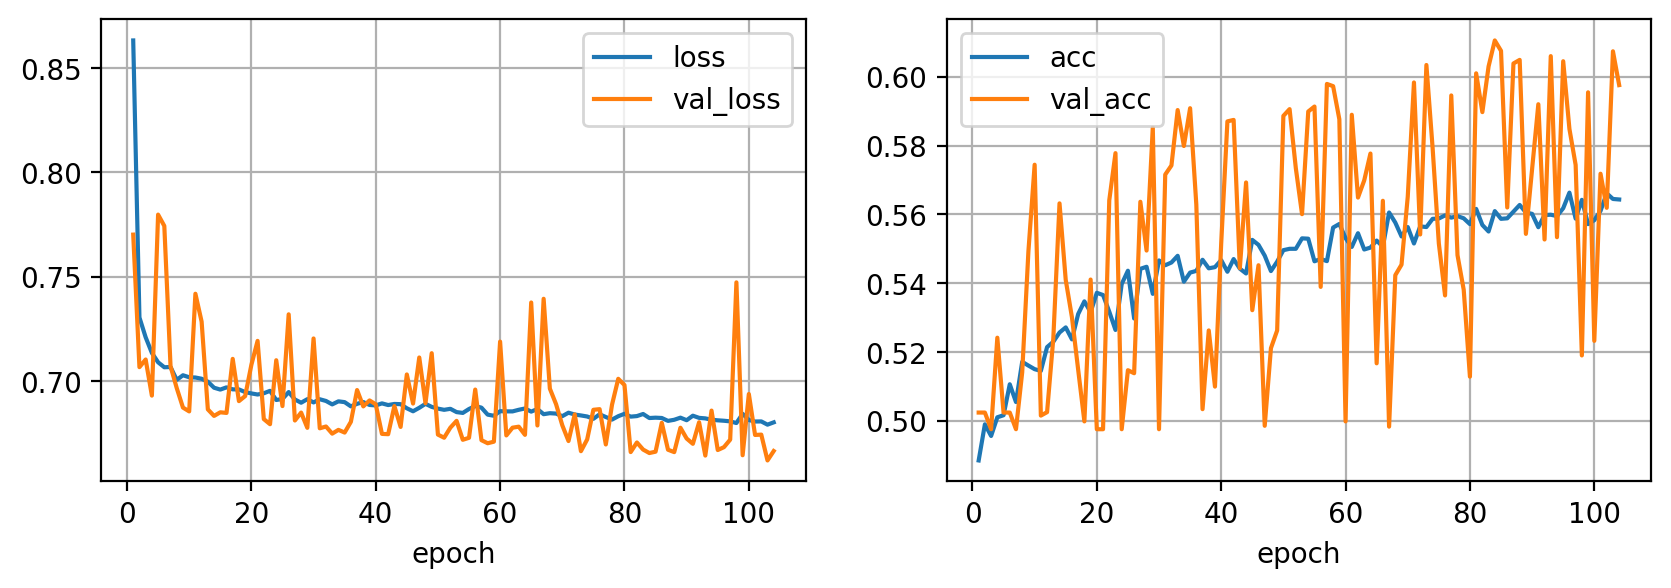

In [55]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# <center> **OPTIMIZACION** </center> 

In [56]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().view(-1, 50*50*3)
        self.Y = torch.from_numpy(Y).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

dataset = {
    'train': Dataset(X_subset, y_subset),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=128, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(5000, 3650)

In [57]:
from sklearn.metrics import accuracy_score

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def build_model(D_in=50*50*3, H=100, D_out=15):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    )

def fit(model, dataloader, optimizer, epochs=100, log_each=10, weight_decay=0, early_stopping=0):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc = [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}

# Sin optimizador

In [58]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
hist_sgd = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.50129 en epoch 1
Mejor modelo guardado con acc 0.50242 en epoch 2
Mejor modelo guardado con acc 0.53702 en epoch 5
Mejor modelo guardado con acc 0.55925 en epoch 10
Epoch 10/100 loss 0.71641 acc 0.54609 val_loss 0.71341 val_acc 0.55925
Mejor modelo guardado con acc 0.56106 en epoch 20
Epoch 20/100 loss 0.69664 acc 0.57480 val_loss 0.69685 val_acc 0.56106
Mejor modelo guardado con acc 0.56558 en epoch 29
Epoch 30/100 loss 0.69075 acc 0.57363 val_loss 0.69157 val_acc 0.56473
Mejor modelo guardado con acc 0.56560 en epoch 33
Mejor modelo guardado con acc 0.56887 en epoch 34
Epoch 40/100 loss 0.68652 acc 0.57402 val_loss 0.68804 val_acc 0.56787
Entrenamiento detenido en epoch 44 por no mejorar en 10 epochs seguidas


# Momentum

In [59]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
hist_momentum = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.49758 en epoch 1
Mejor modelo guardado con acc 0.50267 en epoch 2
Mejor modelo guardado con acc 0.54044 en epoch 6
Mejor modelo guardado con acc 0.58512 en epoch 7
Epoch 10/100 loss 0.69842 acc 0.54238 val_loss 0.74582 val_acc 0.49758
Entrenamiento detenido en epoch 17 por no mejorar en 10 epochs seguidas


# RMSProp

In [60]:
model = build_model()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
hist_rms = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.50242 en epoch 1
Mejor modelo guardado con acc 0.54665 en epoch 6
Mejor modelo guardado con acc 0.59500 en epoch 10
Epoch 10/100 loss 0.66511 acc 0.60000 val_loss 0.67561 val_acc 0.59500
Entrenamiento detenido en epoch 20 por no mejorar en 10 epochs seguidas


# Adam

In [61]:
model = build_model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
hist_adam = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.49758 en epoch 1
Mejor modelo guardado con acc 0.49952 en epoch 2
Mejor modelo guardado con acc 0.52613 en epoch 3
Mejor modelo guardado con acc 0.55800 en epoch 4
Mejor modelo guardado con acc 0.61354 en epoch 6
Mejor modelo guardado con acc 0.61917 en epoch 8
Epoch 10/100 loss 0.66106 acc 0.61016 val_loss 0.64813 val_acc 0.61704
Mejor modelo guardado con acc 0.62406 en epoch 14
Mejor modelo guardado con acc 0.62462 en epoch 15
Epoch 20/100 loss 0.63636 acc 0.63965 val_loss 0.64563 val_acc 0.62317
Entrenamiento detenido en epoch 25 por no mejorar en 10 epochs seguidas


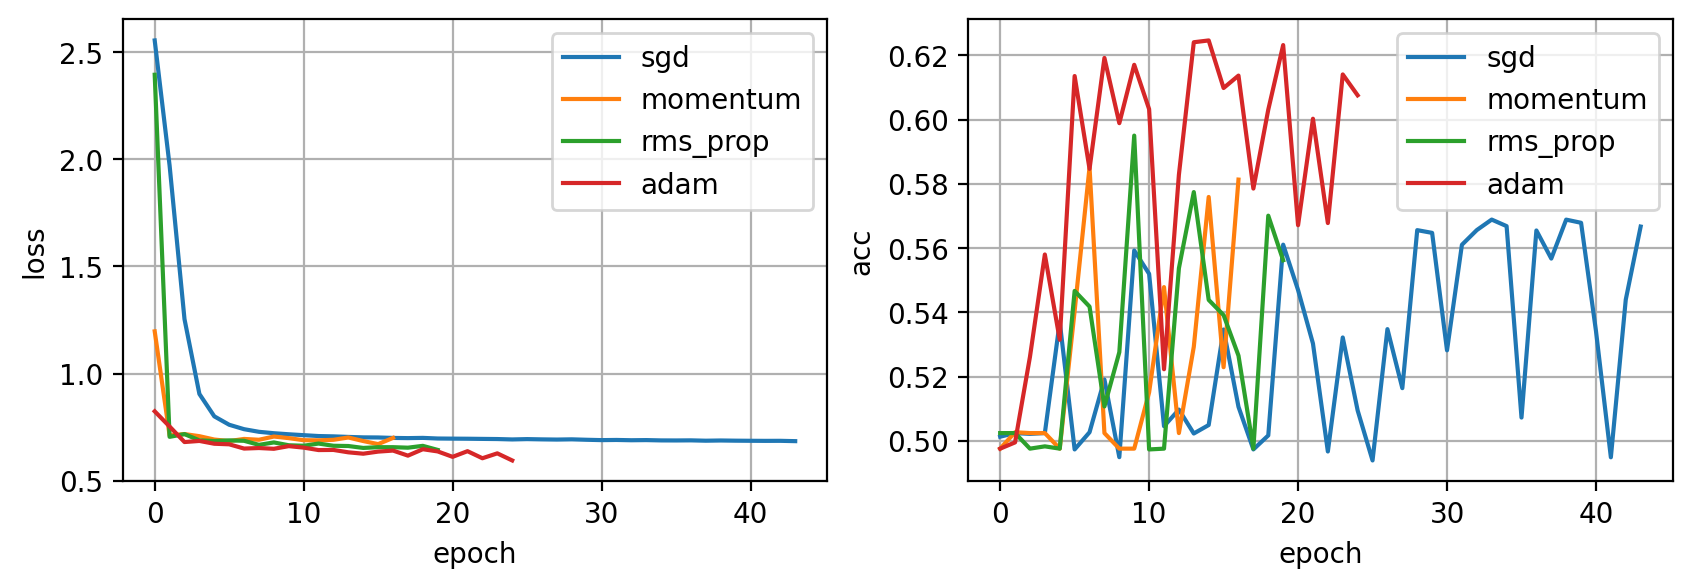

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
ax.plot(hist_sgd['loss'], label="sgd")
ax.plot(hist_momentum['loss'], label="momentum")
ax.plot(hist_rms['loss'], label="rms_prop")
ax.plot(hist_adam['loss'], label="adam")
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
ax.plot(hist_sgd['val_acc'], label="sgd")
ax.plot(hist_momentum['val_acc'], label="momentum")
ax.plot(hist_rms['val_acc'], label="rms_prop")
ax.plot(hist_adam['val_acc'], label="adam")
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# Learning_rate_scheduling

In [63]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=100, log_each=10, weight_decay=0, early_stopping=0):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        if scheduler:
            scheduler.step()
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f} lr {lr[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc, 'lr': lr}

# StepLR

In [64]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# multiplica el lr por 0.1 cada 10 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, 0.1)

hist_step = fit(model, dataloader, optimizer, scheduler, epochs=30, early_stopping=10)

Mejor modelo guardado con acc 0.49090 en epoch 1
Mejor modelo guardado con acc 0.49744 en epoch 2
Mejor modelo guardado con acc 0.50910 en epoch 3
Mejor modelo guardado con acc 0.55108 en epoch 6
Mejor modelo guardado con acc 0.57265 en epoch 10
Epoch 10/30 loss 0.68688 acc 0.55742 val_loss 0.68263 val_acc 0.57265 lr 0.00100
Mejor modelo guardado con acc 0.58635 en epoch 11
Mejor modelo guardado con acc 0.58775 en epoch 17
Epoch 20/30 loss 0.67433 acc 0.60605 val_loss 0.67826 val_acc 0.58719 lr 0.00010
Mejor modelo guardado con acc 0.58788 en epoch 24
Mejor modelo guardado con acc 0.58813 en epoch 29
Epoch 30/30 loss 0.67359 acc 0.60605 val_loss 0.67816 val_acc 0.58487 lr 0.00001


# CyclicLR

In [65]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# aumenta el lr por 5 epochs, luego decrece
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001, max_lr=0.01, step_size_up=5, step_size_down=25)

hist_cycle = fit(model, dataloader, optimizer, scheduler, epochs=30, early_stopping=10)

Mejor modelo guardado con acc 0.49198 en epoch 1
Mejor modelo guardado con acc 0.49619 en epoch 2
Mejor modelo guardado con acc 0.50242 en epoch 3
Mejor modelo guardado con acc 0.54987 en epoch 6
Mejor modelo guardado con acc 0.59023 en epoch 7
Epoch 10/30 loss 0.68301 acc 0.57598 val_loss 0.72245 val_acc 0.53069 lr 0.00842
Mejor modelo guardado con acc 0.59746 en epoch 11
Mejor modelo guardado con acc 0.60600 en epoch 14
Mejor modelo guardado con acc 0.62060 en epoch 15
Epoch 20/30 loss 0.64501 acc 0.62695 val_loss 0.70343 val_acc 0.57756 lr 0.00446
Mejor modelo guardado con acc 0.62742 en epoch 23
Mejor modelo guardado con acc 0.62987 en epoch 28
Mejor modelo guardado con acc 0.63367 en epoch 29
Epoch 30/30 loss 0.59704 acc 0.69219 val_loss 0.63844 val_acc 0.62623 lr 0.00050


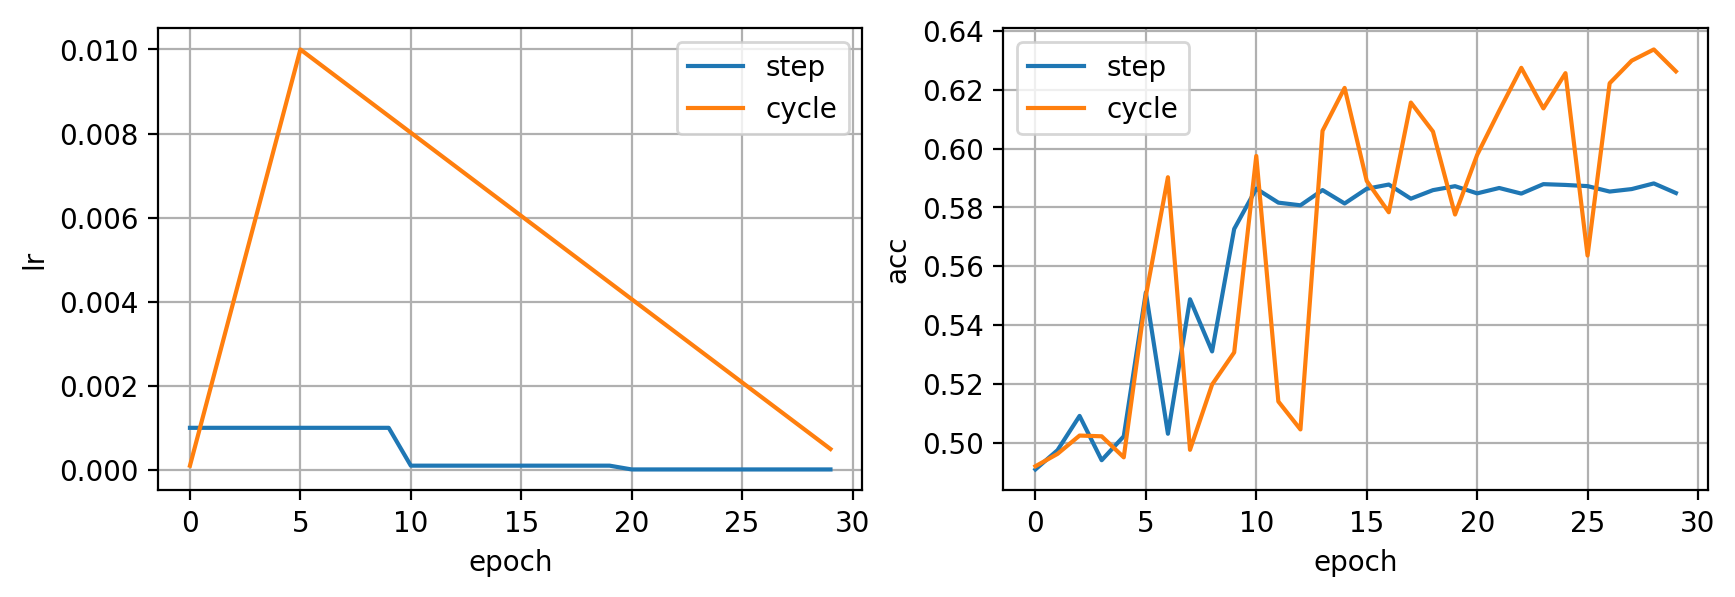

In [66]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
ax.plot(hist_step['lr'], label="step")
ax.plot(hist_cycle['lr'], label="cycle")
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('lr')
ax = plt.subplot(122)
ax.plot(hist_step['val_acc'], label="step")
ax.plot(hist_cycle['val_acc'], label="cycle")
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# <center> Normalizacion</center> 

In [67]:
import numpy as np

mean = (train_images / 255).mean(axis=(0, 1, 2))
std = (train_images / 255).std(axis=(0, 1, 2))

mean, std

(array([0.48824194, 0.45490882, 0.41685331]),
 array([0.25404184, 0.2472657 , 0.24992217]))

In [68]:
train_images_norm = ((train_images / 255) - mean) / std
train_images_norm.mean(axis=(0, 1, 2)), train_images_norm.std(axis=(0, 1, 2))

(array([-2.23491723e-11, -4.39822480e-11, -7.18226747e-11]),
 array([1., 1., 1.]))

In [69]:
X_test_norm = np.array([(np.array(img)/255. - mean) / std for img, label in testset])

X_train_norm, X_val_norm, X_subset_norm = train_images_norm[:20000], train_images_norm[20000:], train_images_norm[:5000]

X_train_norm.shape, X_val_norm.shape, X_test_norm.shape, X_subset_norm.shape

((20000, 50, 50, 3), (3650, 50, 50, 3), (3863, 50, 50, 3), (5000, 50, 50, 3))

In [70]:
dataset_norm = {
    'train': Dataset(X_subset_norm, y_subset),
    'val': Dataset(X_val_norm, y_val),
}

dataloader_norm = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=128, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset_norm['train']), len(dataset_norm['val'])

(5000, 3650)

In [71]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
hist_norm = fit(model, dataloader_norm, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.50242 en epoch 1
Mejor modelo guardado con acc 0.50481 en epoch 3
Mejor modelo guardado con acc 0.52713 en epoch 5
Mejor modelo guardado con acc 0.57694 en epoch 10
Epoch 10/100 loss 0.70348 acc 0.54063 val_loss 0.68201 val_acc 0.57694 lr 0.00100
Mejor modelo guardado con acc 0.58387 en epoch 14
Mejor modelo guardado con acc 0.60115 en epoch 16
Epoch 20/100 loss 0.66628 acc 0.59980 val_loss 0.66539 val_acc 0.60046 lr 0.00100
Mejor modelo guardado con acc 0.60473 en epoch 21
Mejor modelo guardado con acc 0.62106 en epoch 23
Mejor modelo guardado con acc 0.62554 en epoch 27
Epoch 30/100 loss 0.64587 acc 0.63691 val_loss 0.65017 val_acc 0.61742 lr 0.00100
Mejor modelo guardado con acc 0.62640 en epoch 33
Epoch 40/100 loss 0.64158 acc 0.62734 val_loss 0.64833 val_acc 0.61238 lr 0.00100
Entrenamiento detenido en epoch 43 por no mejorar en 10 epochs seguidas


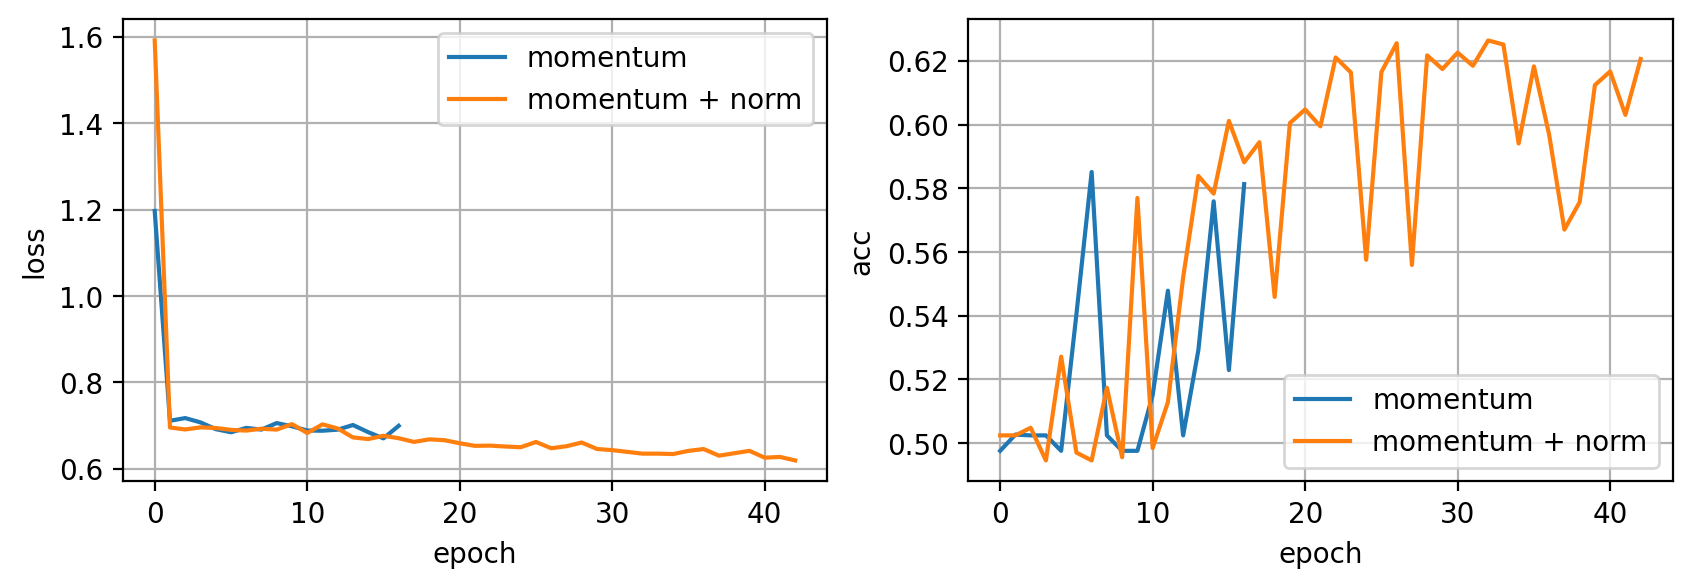

In [72]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
ax.plot(hist_momentum['loss'], label="momentum")
ax.plot(hist_norm['loss'], label="momentum + norm")
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
ax.plot(hist_momentum['val_acc'], label="momentum")
ax.plot(hist_norm['val_acc'], label="momentum + norm")
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# Batch_normalization

In [73]:
def build_model(D_in=50*50*3, H=100, D_out=15):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    )

In [74]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
hist_bn = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.59356 en epoch 1
Mejor modelo guardado con acc 0.60881 en epoch 3
Mejor modelo guardado con acc 0.61675 en epoch 4
Epoch 10/100 loss 0.39676 acc 0.81895 val_loss 1.15268 val_acc 0.59402 lr 0.05000
Entrenamiento detenido en epoch 14 por no mejorar en 10 epochs seguidas


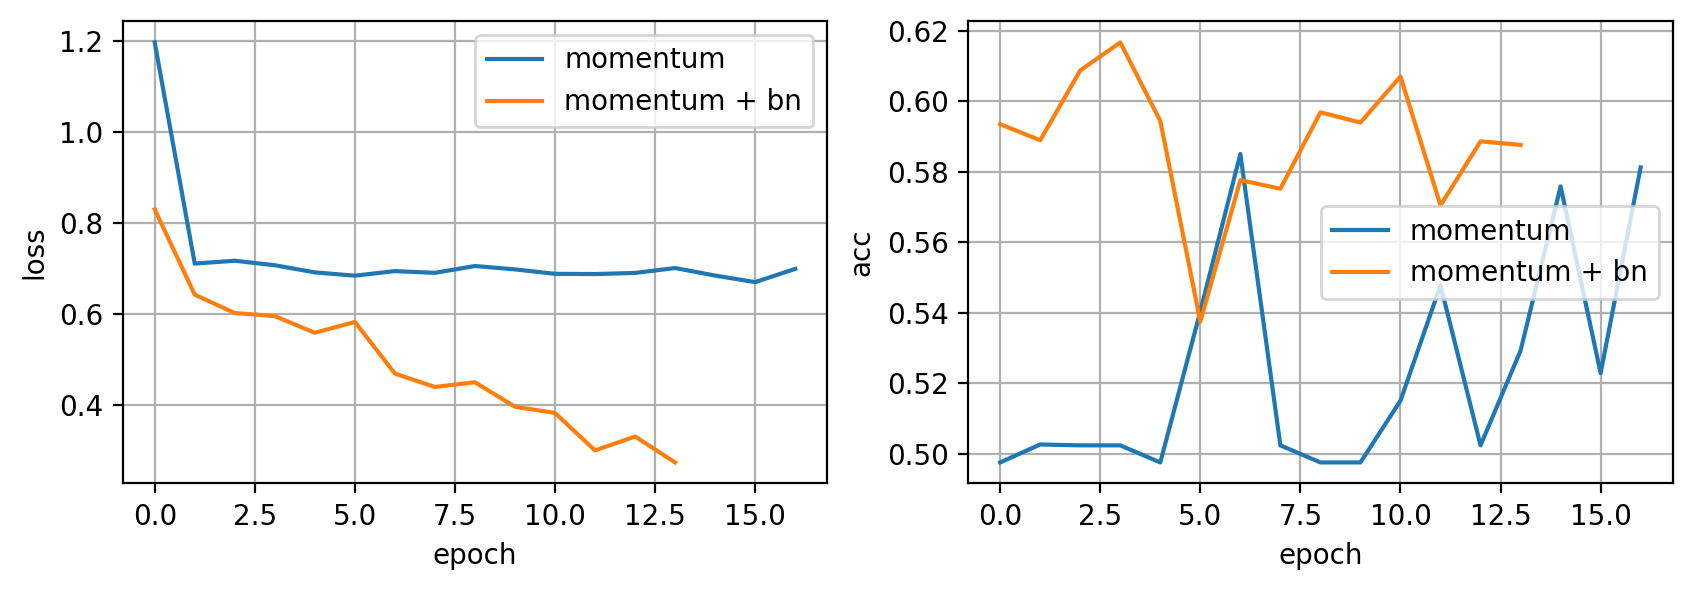

In [75]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
ax.plot(hist_momentum['loss'], label="momentum")
ax.plot(hist_bn['loss'], label="momentum + bn")
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
ax.plot(hist_momentum['val_acc'], label="momentum")
ax.plot(hist_bn['val_acc'], label="momentum + bn")
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# <center> **MLP APLICANDO REGULADORES Y OPTIMIZADORES** </center> 

In [76]:
mean = (train_images / 255).mean(axis=(0, 1, 2))
std = (train_images / 255).std(axis=(0, 1, 2))

mean, std

(array([0.48824194, 0.45490882, 0.41685331]),
 array([0.25404184, 0.2472657 , 0.24992217]))

In [77]:
train_images_norm = ((train_images / 255) - mean) / std
train_images_norm.mean(axis=(0, 1, 2)), train_images_norm.std(axis=(0, 1, 2))

(array([-2.23491723e-11, -4.39822480e-11, -7.18226747e-11]),
 array([1., 1., 1.]))

In [78]:
X_test_norm = np.array([(np.array(img)/255. - mean) / std for img, label in testset])

X_train_norm, X_val_norm, X_subset_norm = train_images_norm[:20000], train_images_norm[20000:], train_images_norm[:5000]

X_train_norm.shape, X_val_norm.shape, X_test_norm.shape, X_subset_norm.shape

((20000, 50, 50, 3), (3650, 50, 50, 3), (3863, 50, 50, 3), (5000, 50, 50, 3))

In [79]:
from albumentations import Compose, RandomCrop, Resize, HorizontalFlip, ToGray, RGBShift, OneOf

trans = Compose([
    RandomCrop(24,24),
    Resize(50, 50),
    HorizontalFlip(),
    OneOf([
        RGBShift(p=0.3)
    ])
])


class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y, trans=None):
        self.X = X
        self.Y = Y
        self.trans = trans
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        img = self.X[ix]
        if self.trans:
            img = trans(image=img)["image"]
        img = torch.from_numpy(img / 255.).float().view(-1)
        label = torch.tensor(self.Y[ix]).long()
        return img, label


dataset = {
    'train': Dataset(X_train_norm, y_train),
    'val': Dataset(X_val_norm, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(20000, 3650)

In [80]:
from sklearn.metrics import accuracy_score

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def build_model(D_in=50*50*3, H=100, D_out=15, p=0):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        #torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, H),
        #torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, H),
        #torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, D_out)
    )

In [81]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=0, log_each=10, weight_decay=0, early_stopping=0):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        if scheduler:
            scheduler.step()
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f} lr {lr[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc, 'lr': lr}

In [86]:
model = build_model(p=0.5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, 0.1)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, step_size_up=5, step_size_down=25)
hist = fit(model, dataloader, optimizer, epochs=500, early_stopping=30)

Mejor modelo guardado con acc 0.49758 en epoch 1
Mejor modelo guardado con acc 0.50242 en epoch 2
Epoch 10/500 loss 0.69811 acc 0.49895 val_loss 0.69344 val_acc 0.50242 lr 0.01000
Epoch 20/500 loss 0.69759 acc 0.50120 val_loss 0.69352 val_acc 0.49758 lr 0.01000
Epoch 30/500 loss 0.69680 acc 0.49825 val_loss 0.69488 val_acc 0.49758 lr 0.01000
Entrenamiento detenido en epoch 32 por no mejorar en 30 epochs seguidas


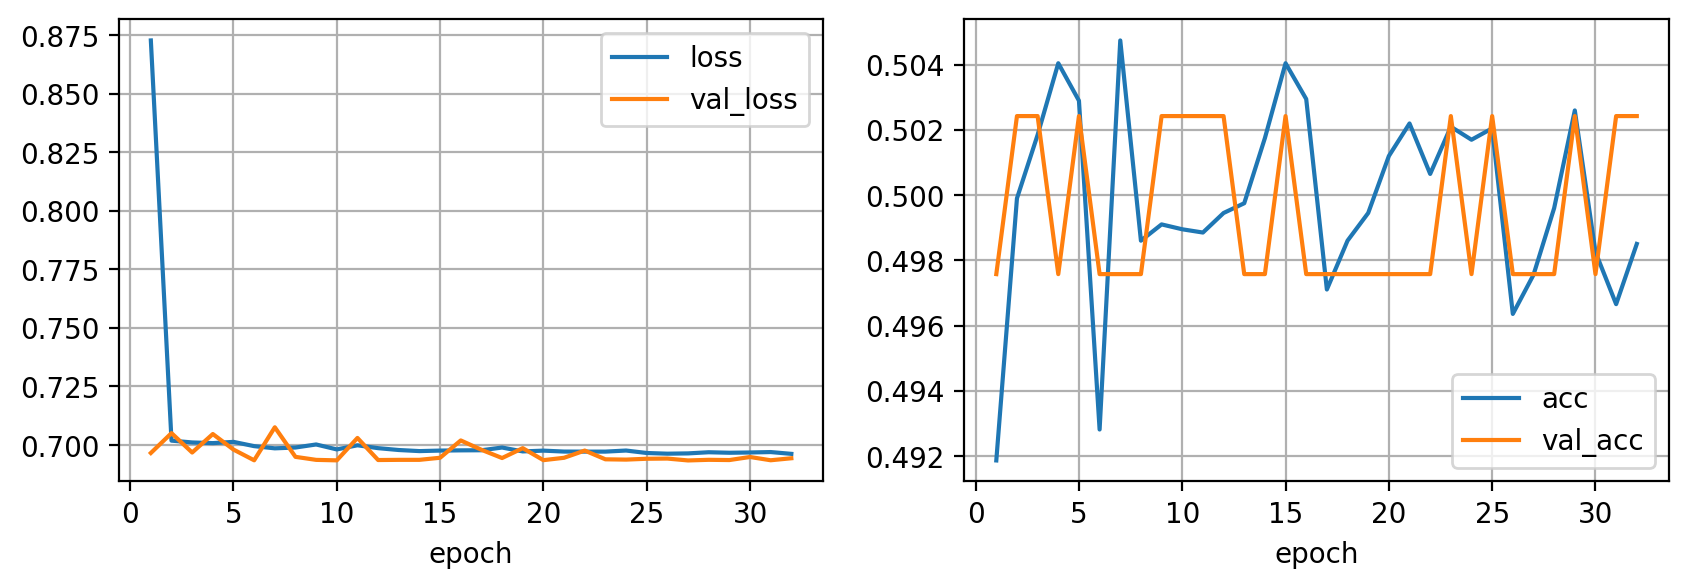

In [87]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()